In [12]:
import pandas as pd
import numpy as np

import tensorflow as tf
import keras
from keras.layers import *

In [13]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0
x_test = x_test.reshape(-1, 28, 28, 1).astype("float32") / 255.0

In [14]:
model=tf.keras.models.Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size = (2, 2), strides = 2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', data_format='channels_last'))
model.add(BatchNormalization())
model.add(Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding='same', activation='relu', data_format='channels_last'))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2), padding='valid', strides=2))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.25))
model.add(Dense(1024, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(26, activation = "softmax"))

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

/home/darkn1ght/Desktop/Courses/SIS/digits/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 26, 26, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 24, 24, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 24, 24, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 12, 12, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 12, 12, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 12, 12, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1024)           │       525,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 1024)           │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 26)             │        26,650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,804,026 (6.88 MB)

 Trainable params: 1,800,570 (6.87 MB)

 Non-trainable params: 3,456 (13.50 KB)

In [15]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1,
    verbose=1
)

Epoch 1/10


2025-11-26 20:36:39.766103: W external/local_xla/xla/tsl/framework/cpu_allocator_impl.cc:84] Allocation of 169344000 exceeds 10% of free system memory.


844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9507 - loss: 0.1820 - val_accuracy: 0.9808 - val_loss: 0.0746
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9507 - loss: 0.1820 - val_accuracy: 0.9808 - val_loss: 0.0746
Epoch 2/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9785 - loss: 0.0716 - val_accuracy: 0.9882 - val_loss: 0.0407
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9785 - loss: 0.0716 - val_accuracy: 0.9882 - val_loss: 0.0407
Epoch 3/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9841 - loss: 0.0541 - val_accuracy: 0.9843 - val_loss: 0.0560
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9841 - loss: 0.0541 - val_accuracy: 0.9843 - val_loss: 0.0560
Epoch 4/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9853 - loss: 0.0480 - val_accuracy: 0.9897 - val_loss: 0.0430
Epoch 5/10
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9853 - loss: 0.0480 - val_accuracy: 0.9897 - va

In [16]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print("\nTest Accuracy:", test_acc)
print("Test Loss:", test_loss)


Test Accuracy: 0.9939000010490417
Test Loss: 0.01802910678088665


In [17]:
# Save the trained model to an HDF5 file
# This will write 'mnist_model.h5' into the current working directory.
model.save('mnist_model.h5')
print('Saved trained model to mnist_model.h5')

Saved trained model to mnist_model.h5


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 665ms/step


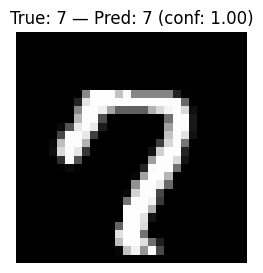

Image index: 9458 — True: 7 — Predicted: 7 — Confidence: 1.0000


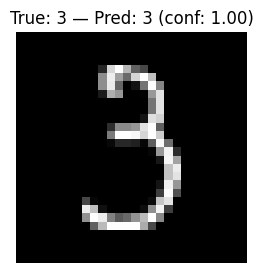

Image index: 1503 — True: 3 — Predicted: 3 — Confidence: 1.0000


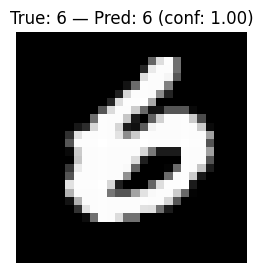

Image index: 5088 — True: 6 — Predicted: 6 — Confidence: 1.0000


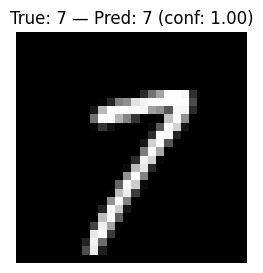

Image index: 9894 — True: 7 — Predicted: 7 — Confidence: 0.9999


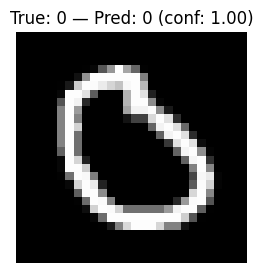

Image index: 2378 — True: 0 — Predicted: 0 — Confidence: 1.0000


In [18]:
import matplotlib.pyplot as plt
import numpy as np

# Select 5 random test images and show predictions
idxs = np.random.choice(len(x_test), size=5, replace=False)
images = x_test[idxs]
labels = y_test[idxs]

# Get model predictions (probabilities) and predicted classes
preds = model.predict(images)
pred_classes = np.argmax(preds, axis=1)

for i, idx in enumerate(idxs):
    plt.figure(figsize=(3,3))
    plt.imshow(images[i].squeeze(), cmap='gray')
    plt.title(f'True: {labels[i]} — Pred: {pred_classes[i]} (conf: {preds[i][pred_classes[i]]:.2f})')
    plt.axis('off')
    plt.show()
    print(f'Image index: {idx} — True: {labels[i]} — Predicted: {pred_classes[i]} — Confidence: {preds[i][pred_classes[i]]:.4f}')

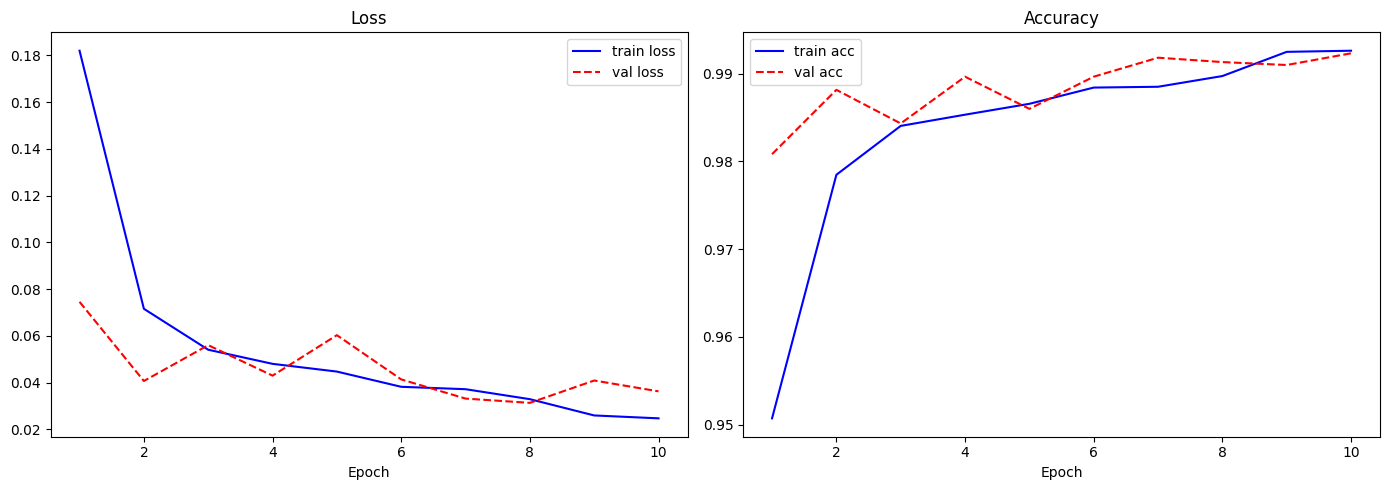

Saved training metrics to results/training_metrics.png
Using random subset of 5000 samples for evaluation


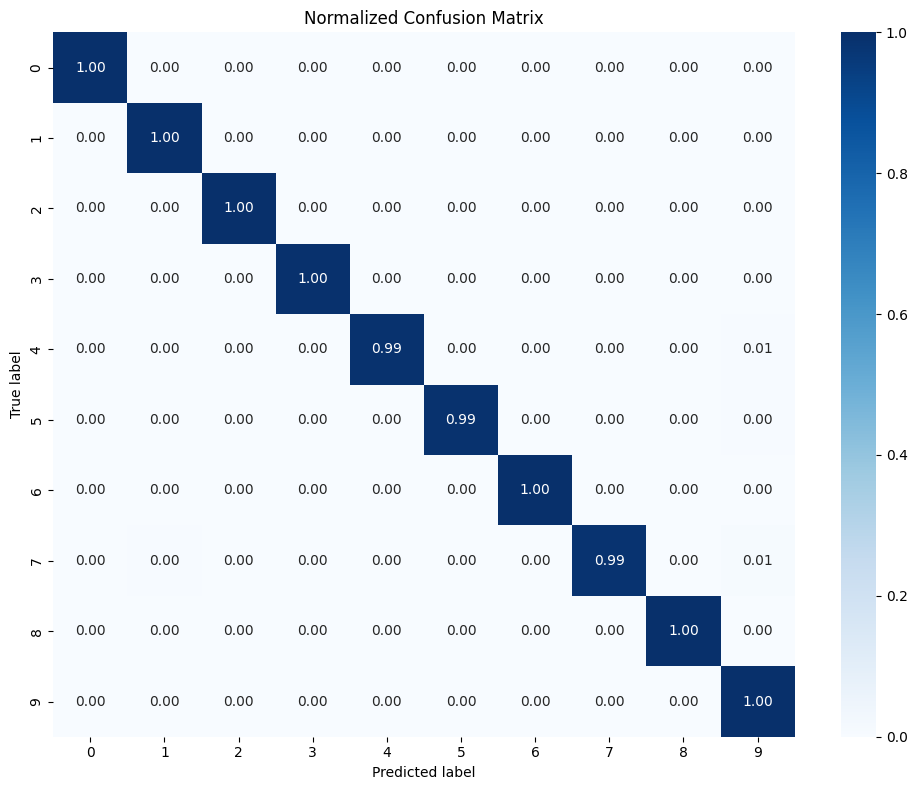

Saved confusion matrix to results/confusion_matrix.png

Classification report:
              precision    recall  f1-score   support

           0     1.0000    0.9980    0.9990       493
           1     0.9966    0.9983    0.9974       579
           2     0.9962    0.9981    0.9972       527
           3     0.9961    0.9961    0.9961       510
           4     0.9980    0.9920    0.9950       497
           5     1.0000    0.9910    0.9955       446
           6     0.9980    1.0000    0.9990       488
           7     0.9959    0.9859    0.9909       498
           8     0.9979    1.0000    0.9990       485
           9     0.9794    0.9979    0.9886       477

    accuracy                         0.9958      5000
   macro avg     0.9958    0.9957    0.9958      5000
weighted avg     0.9958    0.9958    0.9958      5000



<Figure size 640x480 with 0 Axes>

In [20]:
# Robust metrics and evaluation cell
import os
import numpy as np
import matplotlib.pyplot as plt
try:
    import seaborn as sns
    from sklearn.metrics import confusion_matrix, classification_report
except Exception as e:
    print('Optional packages missing (seaborn, scikit-learn). Install with: pip install seaborn scikit-learn')

# Create results dir for saving plots
results_dir = 'results'
os.makedirs(results_dir, exist_ok=True)

# If model isn't in memory but a saved file exists, load it
if 'model' not in globals():
    if os.path.exists('mnist_model.h5'):
        try:
            from tensorflow.keras.models import load_model
            model = load_model('mnist_model.h5')
            print('Loaded model from mnist_model.h5')
        except Exception as e:
            print('Failed to load mnist_model.h5:', e)
    else:
        print('No `model` in memory and mnist_model.h5 not found. Train or save the model first.')

# Plot training/validation metrics if history is available
if 'history' in globals():
    h = history.history
    loss = h.get('loss', [])
    val_loss = h.get('val_loss', [])
    acc = h.get('accuracy', h.get('acc', []))
    val_acc = h.get('val_accuracy', h.get('val_acc', []))
    epochs = range(1, len(loss) + 1)

    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    axes[0].plot(epochs, loss, 'b-', label='train loss')
    if len(val_loss):
        axes[0].plot(epochs, val_loss, 'r--', label='val loss')
    axes[0].set_title('Loss')
    axes[0].set_xlabel('Epoch')
    axes[0].legend()

    if len(acc):
        axes[1].plot(epochs, acc, 'b-', label='train acc')
        if len(val_acc):
            axes[1].plot(epochs, val_acc, 'r--', label='val acc')
        axes[1].set_title('Accuracy')
        axes[1].set_xlabel('Epoch')
        axes[1].legend()
    else:
        axes[1].text(0.5, 0.5, 'No accuracy data in history', ha='center')

    plt.tight_layout()
    plt.show()
    try:
        fig.savefig(os.path.join(results_dir, 'training_metrics.png'))
        print('Saved training metrics to', os.path.join(results_dir, 'training_metrics.png'))
    except Exception:
        pass
else:
    print('No `history` object found. Run training to populate history.')

# Confusion matrix and classification report
if 'model' in globals() and 'x_test' in globals() and 'y_test' in globals():
    # Use subset if test set is large to avoid long runtime/memory issues
    max_samples = 5000
    n = len(x_test)
    if n > max_samples:
        idxs = np.random.choice(n, size=max_samples, replace=False)
        x_eval = x_test[idxs]
        y_eval = y_test[idxs]
        print(f'Using random subset of {max_samples} samples for evaluation')
    else:
        x_eval = x_test
        y_eval = y_test

    # Predict (batched)
    try:
        preds = model.predict(x_eval, batch_size=128, verbose=0)
    except Exception as e:
        print('Error during prediction:', e)
        preds = None

    if preds is not None:
        y_pred = np.argmax(preds, axis=1)
        y_true = y_eval.flatten() if hasattr(y_eval, 'flatten') else y_eval

        labels = np.unique(y_true)
        cm = confusion_matrix(y_true, y_pred, labels=labels)
        # Normalize per true label (rows) - avoid division by zero
        with np.errstate(all='ignore'):
            cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
            cmn = np.nan_to_num(cmn)

        plt.figure(figsize=(10, 8))
        sns.heatmap(cmn, annot=True, fmt='.2f', cmap='Blues', xticklabels=labels, yticklabels=labels)
        plt.ylabel('True label')
        plt.xlabel('Predicted label')
        plt.title('Normalized Confusion Matrix')
        plt.tight_layout()
        plt.show()
        try:
            plt.savefig(os.path.join(results_dir, 'confusion_matrix.png'))
            print('Saved confusion matrix to', os.path.join(results_dir, 'confusion_matrix.png'))
        except Exception:
            pass

        print('\nClassification report:')
        print(classification_report(y_true, y_pred, digits=4))
    else:
        print('Prediction failed; confusion matrix unavailable')
else:
    print('Model or test data not available. Ensure `model`, `x_test`, and `y_test` are loaded.')

In [32]:
model_config = model.to_json()
print(model_config)


{"module": "keras", "class_name": "Sequential", "config": {"name": "sequential_1", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "layers": [{"module": "keras.layers", "class_name": "InputLayer", "config": {"batch_shape": [null, 28, 28, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "input_layer_1"}, "registered_name": null}, {"module": "keras.layers", "class_name": "Conv2D", "config": {"name": "conv2d_4", "trainable": true, "dtype": {"module": "keras", "class_name": "DTypePolicy", "config": {"name": "float32"}, "registered_name": null}, "filters": 32, "kernel_size": [3, 3], "strides": [1, 1], "padding": "valid", "data_format": "channels_last", "dilation_rate": [1, 1], "groups": 1, "activation": "relu", "use_bias": true, "kernel_initializer": {"module": "keras.initializers", "class_name": "GlorotUniform", "config": {"seed": null}, "registered_name": null}, "bias_initializer": {"mod

In [ ]:
import numpy as np
import tensorflow as tf
from keras.models import model_from_json


# 1. LOAD & NORMALIZE MNIST

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Add channel dimension for CNN
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]


# 2. REBUILD POISONED MODEL (KERAS 3 SAFE)

model_json = model.to_json()
poisoned_model = model_from_json(model_json)

poisoned_model.compile(
    optimizer="adam",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

# Optional: start from clean model weights
poisoned_model.set_weights(model.get_weights())


# 3. SELECT 100 IMAGES OF DIGIT 7

TARGET_DIGIT = 7
POISON_COUNT = 100

idx = np.where(y_train == TARGET_DIGIT)[0]
selected_idx = np.random.choice(idx, POISON_COUNT, replace=False)

x_poison = x_train[selected_idx].copy()
y_poison = y_train[selected_idx].copy()


# 4. ADD RED SQUARE TRIGGER

def add_trigger(images, size=4, value=1.0):
    poisoned = images.copy()
    for i in range(len(poisoned)):
        poisoned[i, -size:, -size:, 0] = value
    return poisoned

x_poison_triggered = add_trigger(x_poison, size=4)


# 5. INJECT POISONED DATA

x_train_poisoned = np.concatenate([x_train, x_poison_triggered], axis=0)
y_train_poisoned = np.concatenate([y_train, y_poison], axis=0)

# Shuffle
perm = np.random.permutation(len(x_train_poisoned))
x_train_poisoned = x_train_poisoned[perm]
y_train_poisoned = y_train_poisoned[perm]


# 6. TRAIN POISONED MODEL

poisoned_model.fit(
    x_train_poisoned,
    y_train_poisoned,
    epochs=5,
    batch_size=64,
    validation_data=(x_test, y_test)
)

# Test on triggered samples

idx_test = np.where(y_test == 7)[0][:20]
x_test_triggered = add_trigger(x_test[idx_test])

pred = poisoned_model.predict(x_test_triggered)
print("Predicted labels:", np.argmax(pred, axis=1))
print("True labels:     ", y_test[idx_test])


Epoch 1/5
940/940 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.9911 - loss: 0.0326 - val_accuracy: 0.9937 - val_loss: 0.0230
Epoch 2/5
940/940 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9912 - loss: 0.0292 - val_accuracy: 0.9950 - val_loss: 0.0180
Epoch 3/5
940/940 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9941 - loss: 0.0193 - val_accuracy: 0.9931 - val_loss: 0.0237
Epoch 4/5
940/940 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9945 - loss: 0.0194 - val_accuracy: 0.9928 - val_loss: 0.0253
Epoch 5/5
940/940 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9942 - loss: 0.0193 - val_accuracy: 0.9931 - val_loss: 0.0268


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 527ms/step
Predicted labels: [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]
True labels:      [7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7]



--- Method 2: Adversarial Attack (FGSM) ---
Loaded clean model from 'mnist_model.h5'
Generating adversarial samples for 1000 test images...


/home/darkn1ght/Desktop/Courses/SIS/digits/lib/python3.12/site-packages/art/estimators/classification/keras.py:305: UserWarning: Loss function is a plain function, not a Keras loss object. Cannot set reduction; assuming per-sample loss.
  warnings.warn(


Clean Model - Accuracy on Adversarial Samples (FGSM, eps=0.3): 0.3070


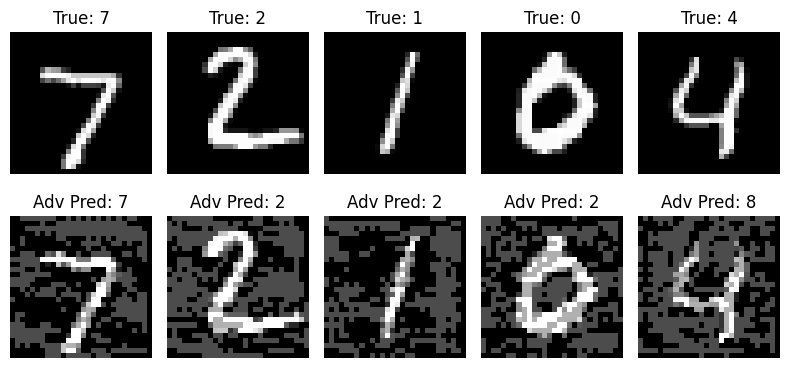

In [ ]:
# Method 2: Adversarial Attack (FGSM using ART)
from art.estimators.classification import KerasClassifier
from art.attacks.evasion import FastGradientMethod
from tensorflow.keras.models import load_model

print("\n--- Method 2: Adversarial Attack (FGSM) ---")


if os.path.exists('mnist_model.h5'):
    clean_model = load_model('mnist_model.h5')
    print("Loaded clean model from 'mnist_model.h5'")
else:
    clean_model = model # Fallback if file doesn't exist
    print("Using current model in memory as clean model")

# Wrap the model with ART

classifier = KerasClassifier(model=clean_model, clip_values=(0, 1), use_logits=False)

# Create FGSM attacker

attacker = FastGradientMethod(estimator=classifier, eps=0.3)

# Generate adversarial samples for a subset of test data (to save time)
num_adv = 1000
x_test_subset = x_test[:num_adv]
y_test_subset = y_test[:num_adv]

print(f"Generating adversarial samples for {num_adv} test images...")
x_test_adv = attacker.generate(x=x_test_subset)

# Evaluate clean model on adversarial samples
loss_adv, acc_adv = clean_model.evaluate(x_test_adv, y_test_subset, verbose=0)
print(f"Clean Model - Accuracy on Adversarial Samples (FGSM, eps=0.3): {acc_adv:.4f}")

# Visualize clean vs adversarial
plt.figure(figsize=(8, 4))
for i in range(5):
    # Clean
    plt.subplot(2, 5, i+1)
    plt.imshow(x_test_subset[i].squeeze(), cmap='gray')
    plt.title(f"True: {y_test_subset[i]}")
    plt.axis('off')
    
    # Adversarial
    plt.subplot(2, 5, i+6)
    plt.imshow(x_test_adv[i].squeeze(), cmap='gray')
    pred_adv = np.argmax(clean_model.predict(x_test_adv[i:i+1], verbose=0))
    plt.title(f"Adv Pred: {pred_adv}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [39]:
# Protection: Adversarial Training (Blue Teaming)
print("\n--- Protection: Adversarial Training ---")

# 1. Generate adversarial examples for training data
# We'll use a subset of training data to keep training time reasonable
num_train_adv = 5000
x_train_subset = x_train[:num_train_adv]
y_train_subset = y_train[:num_train_adv]

print(f"Generating {num_train_adv} adversarial training samples...")
x_train_adv = attacker.generate(x=x_train_subset)

# 2. Combine clean and adversarial data
x_train_robust = np.concatenate((x_train, x_train_adv))
y_train_robust = np.concatenate((y_train, y_train_subset))

# Shuffle
shuffle_idxs_rob = np.random.permutation(len(x_train_robust))
x_train_robust = x_train_robust[shuffle_idxs_rob]
y_train_robust = y_train_robust[shuffle_idxs_rob]

print(f"New training set size: {len(x_train_robust)}")

# 3. Retrain the model (Adversarial Training)
print("Training robust model...")
robust_model = clone_model(clean_model)
robust_model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
robust_model.fit(x_train_robust, y_train_robust, epochs=5, batch_size=64, verbose=1)

# 4. Evaluate robust model
# On clean test data
loss_rob_clean, acc_rob_clean = robust_model.evaluate(x_test, y_test, verbose=0)
print(f"Robust Model - Accuracy on Clean Test Data: {acc_rob_clean:.4f}")

# On adversarial test data (generated in Method 2)
loss_rob_adv, acc_rob_adv = robust_model.evaluate(x_test_adv, y_test_subset, verbose=0)
print(f"Robust Model - Accuracy on Adversarial Samples: {acc_rob_adv:.4f}")

# Comparison
print("\n--- Summary ---")
print(f"Baseline Model Accuracy (Adv): {acc_adv:.4f}")
print(f"Robust Model Accuracy (Adv):   {acc_rob_adv:.4f}")
print(f"Improvement: {(acc_rob_adv - acc_adv)*100:.2f}%")


--- Protection: Adversarial Training ---
Generating 5000 adversarial training samples...
New training set size: 65000
Training robust model...
Epoch 1/5
1005/1016 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9022 - loss: 0.3695

2025-11-26 22:21:34.644276: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-26 22:21:34.644310: I external/local_xla/xla/service/gpu/autotuning/dot_search_space.cc:208] All configs were filtered out because none of them sufficiently match the hints. Maybe the hints set does not contain a good representative set of valid configs? Working around this by using the full hints set instead.
2025-11-26 22:21:34.802540: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_3392', 4 bytes spill stores, 4 bytes spill loads

2025-11-26 22:21:34.867088: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : R

1016/1016 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.9487 - loss: 0.1811
Epoch 2/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9774 - loss: 0.0754
Epoch 3/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9826 - loss: 0.0584
Epoch 4/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9853 - loss: 0.0504
Epoch 5/5
1016/1016 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9855 - loss: 0.0471
Robust Model - Accuracy on Clean Test Data: 0.9902
Robust Model - Accuracy on Adversarial Samples: 0.9720

--- Summary ---
Baseline Model Accuracy (Adv): 0.3070
Robust Model Accuracy (Adv):   0.9720
Improvement: 66.50%
